In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy        import signal
from scipy.signal import butter
from scipy.signal import cheby1

In [112]:
def freqs_plot(a,b,l=3): 
    w, h = signal.freqs(b, a, worN=np.logspace(0, l, 5000))
    plt.semilogx(w, abs(h),linewidth=3)
    plt.xlabel('Frecuencia')
    plt.ylabel('Magnitud')
    plt.grid()
    plt.show()

In [3]:
def freqz_plot(b,a,sr):
    w, h = signal.freqz(b,a)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [44]:
n  = 2
wc = 37

print butter(n, wc, analog=True, output='zpk')
print ''
print butter(n, wc, analog=True, output='ba')

(array([], dtype=float64), array([-26.1629509+26.1629509j, -26.1629509-26.1629509j]), 1369.0)

(array([ 1369.]), array([  1.00000000e+00,   5.23259018e+01,   1.36900000e+03]))


In [45]:
z,p,k = butter(n, wc, analog=True, output='zpk')
print 2*p[0].real, p[0]*p[-1]

-52.3259018078 (1369+0j)


In [46]:
z,p,k = butter(n, wc, analog=True, output='zpk')

l = p.shape[0]
for i,j in zip( p[:l/2],p[::-1][:l/2] ):
    print 2*i.real, i*j


-52.3259018078 (1369+0j)


In [47]:
z,p,k = butter(n, wc, analog=True, output='zpk')

l = p.shape[0]

print   p[:l/2]*p[::-1][:l/2]
print 2*p[:l/2].real


[ 1369.+0.j]
[-52.32590181]


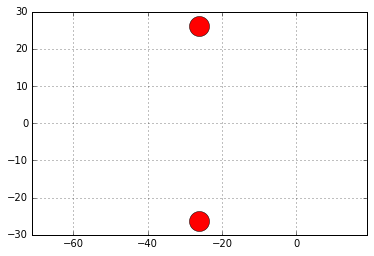

(-26.1629509039-26.1629509039j)


In [48]:
for i in p:
    plt.plot(i.real, i.imag,'ro',markersize=20)

plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')
plt.show()
print i

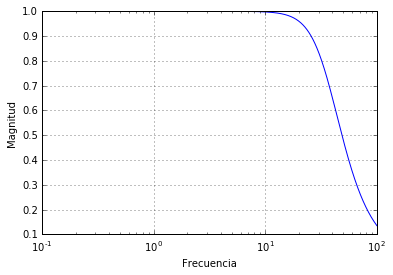

In [49]:
b,a = butter(n, wc, analog=True, output='ba')
freqs_plot(a,b)

In [55]:
n  = 2
wc = 1.

print butter(n, wc, btype='high', analog=True, output='zpk')
print ''
print butter(n, wc, btype='high', analog=True, output='ba')

(array([ 0.,  0.]), array([-0.70710678-0.70710678j, -0.70710678+0.70710678j]), 1.0)

(array([ 1.,  0.,  0.]), array([ 1.        ,  1.41421356,  1.        ]))


In [96]:
n=2
z,p,k = butter(n, [14,43], btype='stop', analog=True, output='zpk')

print p
print ''

l = p.shape[0]
print 2*p[::2].real
print np.prod( p.reshape(2,l/2),axis=1 )

[ -6.03054618+14.6433274j   -6.03054618-14.6433274j
 -14.47555048-35.14942406j -14.47555048+35.14942406j]

[-12.06109236 -28.95110095]
[  250.79452458+0.j  1445.02357299+0.j]


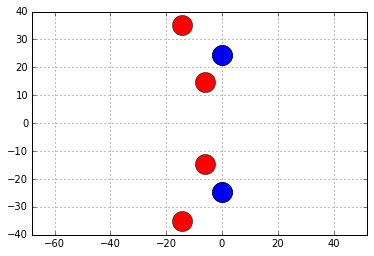

(-14.4755504756+35.1494240553j) -24.5356882928j


In [97]:
for i in p:
    plt.plot(i.real, i.imag,'ro',markersize=20)

for j in z:
    plt.plot(j.real, j.imag,'bo',markersize=20)

plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')
plt.show()
print i, j

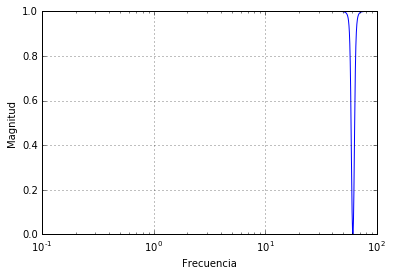

In [102]:
b,a = butter(n, [58,64],btype='stop', analog=True, output='ba')

freqs_plot(a,b)

In [114]:
n     = 8
rp    = 1.
wc    = 1.

z,p,k = cheby1(n, rp, wc, analog=True, output='zpk')
l = p.shape[0]
for i,j in zip( p[:l/2],p[::-1][:l/2] ):
    print 2*i.real, i*j


-0.0700164666042 (0.994140735045+0j)
-0.199390027473 (0.723542684972+0j)
-0.298408264134 (0.340859252607+0j)
-0.351996547659 (0.0702612025342+0j)


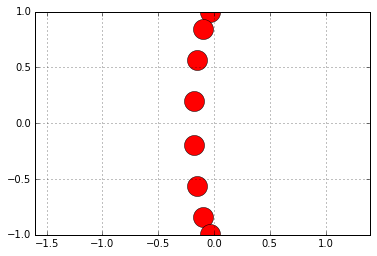

(-0.0350082333021-0.996451282626j) (-0.175998273829-0.198206483606j)


In [115]:
for i in p:
    plt.plot(i.real, i.imag,'ro',markersize=20)

for j in z:
    plt.plot(j.real, j.imag,'bo',markersize=20)

plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')
plt.show()
print i, j

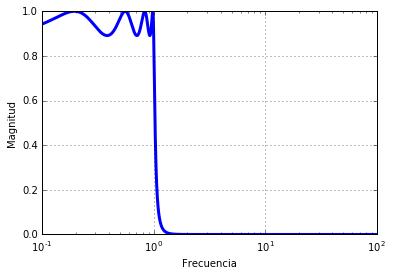

In [116]:
b, a  = cheby1(n, rp, wc, analog=True, output='ba')
freqs_plot(a,b)